In [8]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import os

In [9]:
# Paths
train = 'D:/DOWNLOADS/BRAVE/Aachen/Only/dataset/train'
test = 'D:/DOWNLOADS/BRAVE/Aachen/Only/dataset/test'

# Define train (10901)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(150, 150),
    batch_size=32
)

# Define test (2698)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test,
    image_size=(150, 150),
    batch_size=32
)

Found 11072 files belonging to 4 classes.
Found 3571 files belonging to 4 classes.


In [10]:
# Convert to binary classification for fresh vs. rotten
def binary_conversion(images, labels):
    binary_labels = tf.where(labels < 3, 0, 1)  # 0 for 'fresh', 1 for 'rotten'
    return images, binary_labels

# Apply mapping - notice no parentheses after binary_conversion
train_ds = train_ds.map(binary_conversion)
test_ds = test_ds.map(binary_conversion)

In [11]:
# Scale image pixel values [0, 1]
normalized = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalized(x), y))
test_ds = test_ds.map(lambda x, y: (normalized(x), y))

In [12]:
# CNN model
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

In [13]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)

In [14]:
# Split training data into train and validation
train_size = int(0.8 * len(train_ds))
train_dataset = train_ds.take(train_size)
val_dataset = train_ds.skip(train_size)

history = model.fit(
    train_dataset,
    validation_data=val_dataset, 
    epochs=10
)

Epoch 1/10
276/276 [==============================] - 333s 1s/step - loss: 0.1784 - accuracy: 0.9260 - val_loss: 0.0636 - val_accuracy: 0.9746
Epoch 2/10
276/276 [==============================] - 286s 1s/step - loss: 0.0670 - accuracy: 0.9736 - val_loss: 0.0727 - val_accuracy: 0.9728
Epoch 3/10
276/276 [==============================] - 277s 1s/step - loss: 0.0496 - accuracy: 0.9810 - val_loss: 0.0188 - val_accuracy: 0.9942
Epoch 4/10
276/276 [==============================] - 274s 990ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0110 - val_accuracy: 0.9960
Epoch 5/10
276/276 [==============================] - 278s 1s/step - loss: 0.0163 - accuracy: 0.9941 - val_loss: 0.0073 - val_accuracy: 0.9978
Epoch 6/10
276/276 [==============================] - 286s 1s/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 7/10
276/276 [==============================] - 279s 1s/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy}")

112/112 [==============================] - 34s 299ms/step - loss: 0.0150 - accuracy: 0.9944
Test accuracy: 0.9943993091583252


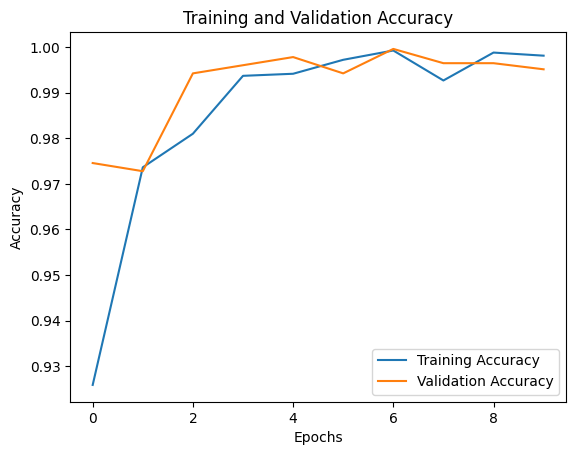

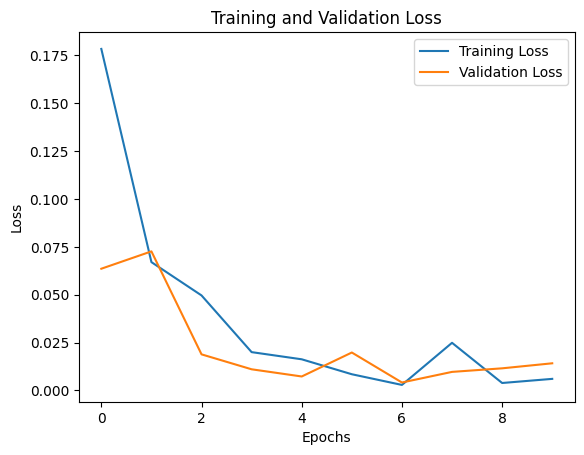

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

112/112 [==============================] - 30s 266ms/step - loss: 0.0150 - accuracy: 0.9944
Training Accuracy: 0.9981
Validation Accuracy: 0.9951
Test Accuracy: 0.9944


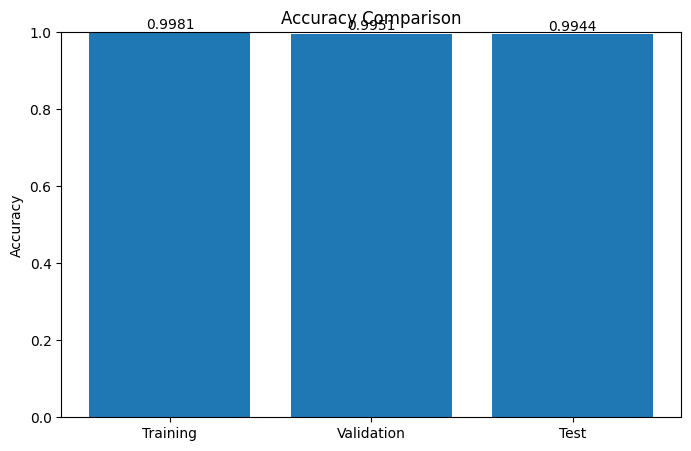

In [18]:
# Get training accuracy from the last epoch
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Get test accuracy
test_loss, test_accuracy = model.evaluate(test_ds)

# Print all accuracies
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 5))
accuracies = [final_train_accuracy, final_val_accuracy, test_accuracy]
labels = ['Training', 'Validation', 'Test']

plt.bar(labels, accuracies)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

In [19]:
model.save(r"D:/DOWNLOADS/BRAVE/Aachen/Only/models/tf_best_new.h5")
